## Importing the Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data

In [ ]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


*  the data contains 8807 show records
*  we have null values for director, cast, country and data_added, we may need to clean up these values
*  we also observe that values in director, cast, listed_in (genre) are separated by comma, so we may want to unnest these columns

In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


*  the data contains shows which were released from 1925 to 2021.
*  around 50% of the shows seems to be released in the year 2013 to 2019.
*  the interesting fact is that about 25% percentage of movies are from 2019 to 2021, a span of just 3 years, while remaining 75% contains movies from 1925 to 2019, a span of around 95 years.
*  this shows that many movies which are added to the platform are from the recent years. Ofcourse, the number of movies directed also influences this.

## Exploratory Analysis

In [ ]:
# lets check records with null value for date_added
data[data['date_added'].isna()][['date_added', 'release_year']]

,date_added,release_year
6066,NaN,2013
6174,NaN,2018
6795,NaN,2003
6806,NaN,2003
6901,NaN,2008
7196,NaN,2010
7254,NaN,2012
7406,NaN,2016
7847,NaN,2015
8182,NaN,2015


*  since there are only few rows where date_added is missing, lets remove these rows

In [ ]:
data.dropna(subset = ['date_added'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      6173 non-null   object
 4   cast          7972 non-null   object
 5   country       7967 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


In [ ]:
#lets convert the date_added column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])
np.sort(data['date_added'].dt.year.unique()) # we have records for the shows added from 2008 to 2021

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [ ]:
data['rating'].unique()
# ratings are not on a uniform scale, so it is not possible to analyse against each other

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# there are some records where rating is not proper, lets take a closer look
data['rating'].isin(['74 min', '84 min', '66 min']).sum()

3

In [ ]:
# there are some records where rating is none, lets take a closer look
data['rating'].isna().sum()

4

In [ ]:
#these are only total 7 records, lets drop them all
data.drop(data[data['rating'].isin(['74 min', '84 min', '66 min'])].index, inplace = True)
data.dropna(subset = ['rating'], inplace = True)
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# lets look at the duration now
np.sort(data['duration'].unique())

array(['1 Season', '10 Seasons', '10 min', '100 min', '101 min',
       '102 min', '103 min', '104 min', '105 min', '106 min', '107 min',
       '108 min', '109 min', '11 Seasons', '11 min', '110 min', '111 min',
       '112 min', '113 min', '114 min', '115 min', '116 min', '117 min',
       '118 min', '119 min', '12 Seasons', '12 min', '120 min', '121 min',
       '122 min', '123 min', '124 min', '125 min', '126 min', '127 min',
       '128 min', '129 min', '13 Seasons', '13 min', '130 min', '131 min',
       '132 min', '133 min', '134 min', '135 min', '136 min', '137 min',
       '138 min', '139 min', '14 min', '140 min', '141 min', '142 min',
       '143 min', '144 min', '145 min', '146 min', '147 min', '148 min',
       '149 min', '15 Seasons', '15 min', '150 min', '151 min', '152 min',
       '153 min', '154 min', '155 min', '156 min', '157 min', '158 min',
       '159 min', '16 min', '160 min', '161 min', '162 min', '163 min',
       '164 min', '165 min', '166 min', '167 min', '1

In [ ]:
# in duration we have time in seasons and also in minutes, lets convert it into minutes for easy analysis

def convert_duration_to_min(df):
  '''Function to convert the seasons to minutes'''

  # Dropping the rows without values to calculate the average time
  dur = df['duration'].dropna()

  # finding the average time in minutes for the shows where duration is given in minutes
  avg_min = round(dur[dur.str.contains('min')].apply(lambda x : float(str(x).split()[0])).mean(),2)

  # function to change string to numerical value
  def min_sea(x):
    if pd.isna(x):
      return avg_min
    elif 'Season' in x:
      return float(str(x).split()[0]) * avg_min
    elif 'min' in x:
      return float(str(x).split()[0])

  df['duration'] = df['duration'].apply(min_sea)

  return df['duration']

data['duration_min'] = convert_duration_to_min(data.copy())
data['duration_min'].describe()


count    8790.000000
mean      122.274956
std        94.687232
min         3.000000
25%        92.000000
50%        99.580000
75%       118.000000
max      1692.860000
Name: duration_min, dtype: float64

*  the mean show time is 122 mins (aproximately about 2 hours)
*  more than 75% of the shows run for less than 118 mins
*  the maximum run time of a show is 1692 mins. It must be due to a long running season with multiple episodes.
*  only 25% percentage of the shows are long running, with duration more than 118 minutes

In [ ]:
data['listed_in'].nunique()
# we have 513 unique categories ,but each row contains multiple genres together separated by comma.

513

In [ ]:
#lets explode the listed_in column to individual rows with each genre in separate row
data['genre'] = data['listed_in'].str.split(",")
data['genre'] = data['genre'].apply(lambda x : [each.strip() for each in x])
data_genre = data.explode('genre') # a new dataframe is created so as not to explode the rows in the original dataframe
data_genre.genre.nunique() # we have totally 42 genres

42

In [ ]:
data_dir = data.dropna(subset = ['director'])
data_dir['director'] = data_dir['director'].str.split(",")
data_dir['director'] = data_dir['director'].apply(lambda x : [each.strip() for each in x])
data_dir = data_dir.explode('director')
data_dir.director.value_counts()

<ipython-input-16-edf41b6ccce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dir['director'] = data_dir['director'].str.split(",")
<ipython-input-16-edf41b6ccce2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dir['director'] = data_dir['director'].apply(lambda x : [each.strip() for each in x])


Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4991, dtype: int64

In [ ]:
data_cast = data.dropna(subset = ['cast'])
data_cast['cast'] = data_cast[~data_cast['cast'].isna()]['cast'].str.split(",")
data_cast['cast'] = data_cast['cast'].apply(lambda x : [each.strip() for each in x])
data_cast = data_cast.explode('cast')

<ipython-input-17-99597185c86d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cast['cast'] = data_cast[~data_cast['cast'].isna()]['cast'].str.split(",")
<ipython-input-17-99597185c86d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cast['cast'] = data_cast['cast'].apply(lambda x : [each.strip() for each in x])


In [ ]:
data_country = data.dropna(subset = ['country'])
data_country['country'] = data_country['country'].str.split(",")
data_country['country'] = data_country['country'].apply(lambda x : [each.strip() for each in x])
data_country = data_country.explode('country')
data_country.country.value_counts()

<ipython-input-18-5ab71ac0bfcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['country'] = data_country['country'].str.split(",")
<ipython-input-18-5ab71ac0bfcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['country'] = data_country['country'].apply(lambda x : [each.strip() for each in x])


United States     3681
India             1046
United Kingdom     805
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

In [ ]:
data.info() #now we have taken care all the features which we are intersted on

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          7965 non-null   object        
 5   country       7961 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  duration_min  8790 non-null   float64       
 13  genre         8790 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [ ]:
#finally our data looks good, lets drop all the unwanted columns
data = data.drop(columns = ['show_id', 'title', 'listed_in', 'description', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   director      6169 non-null   object        
 2   cast          7965 non-null   object        
 3   country       7961 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   duration_min  8790 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 686.7+ KB


In [ ]:
data_genre = data_genre.drop(columns = ['show_id', 'title', 'listed_in', 'description', 'duration'])
data_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19294 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          19294 non-null  object        
 1   director      13435 non-null  object        
 2   cast          17790 non-null  object        
 3   country       17574 non-null  object        
 4   date_added    19294 non-null  datetime64[ns]
 5   release_year  19294 non-null  int64         
 6   rating        19294 non-null  object        
 7   duration_min  19294 non-null  float64       
 8   genre         19294 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [ ]:
data_cast = data_cast.drop(columns = ['show_id', 'title', 'listed_in', 'description', 'duration'])
data_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64016 entries, 1 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          64016 non-null  object        
 1   director      45455 non-null  object        
 2   cast          64016 non-null  object        
 3   country       59120 non-null  object        
 4   date_added    64016 non-null  datetime64[ns]
 5   release_year  64016 non-null  int64         
 6   rating        64016 non-null  object        
 7   duration_min  64016 non-null  float64       
 8   genre         64016 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 4.9+ MB


# Non-graphical Analysis

In [ ]:
data['type'].value_counts() # we have maximum number of movies compared to TV shows

Movie      6126
TV Show    2664
Name: type, dtype: int64

*  we have maximum number of movies compared to TV shows.
*  this explains the average duration time coming around 122 mins, since movies are the major data points in the dataset

In [ ]:
data['director'].value_counts()
# we have total 4526 directors with Rajiv Chilaka directing the maximum number of movies

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4526, dtype: int64

In [ ]:
data['country'].value_counts()
# total 748 countries are using Netflix with United States having the maximum shows followed by India

United States                             2809
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
data['date_added'].dt.year.value_counts()
# most of the movies were added in the 2017 - 2020

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64

In [ ]:
data['release_year'].value_counts()
# most of the movies were released in the year 1146

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
np.sort(data['release_year'].unique())
# we have movies released from 1925 till 2021

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
data_genre['genre'].value_counts()
# International movies has the maximum number of shows

International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

In [ ]:
data_cast['cast'].value_counts()

# Anupam Kher has acted in most of the shows/movies

Anupam Kher              43
Shah Rukh Khan           35
Julie Tejwani            33
Naseeruddin Shah         32
Takahiro Sakurai         32
                         ..
Julissa Calderon          1
Karrie Martin             1
Ted Kaczynski             1
Tonya Kay                 1
Chittaranjan Tripathy     1
Name: cast, Length: 36392, dtype: int64

# Visual Analysis

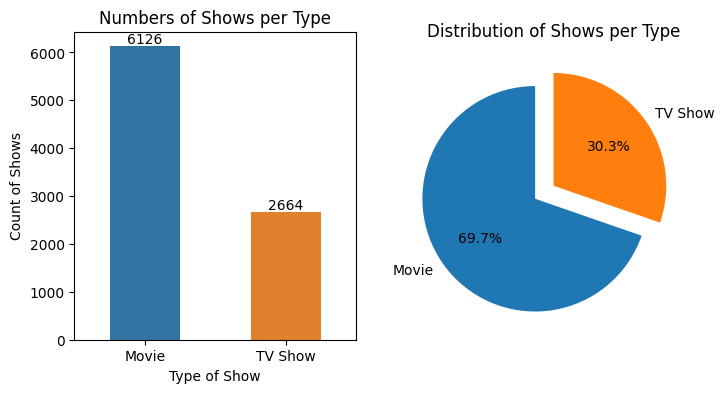

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Numbers of Shows per Type')
ax = sns.countplot(data, x = 'type', width = 0.5, order = data['type'].value_counts().index, palette = sns.color_palette())
ax.bar_label(container = ax.containers[0], labels = data['type'].value_counts().values)
plt.xlabel('Type of Show')
plt.ylabel('Count of Shows')
plt.subplot(1,2,2)
plt.title('Distribution of Shows per Type')
plt.pie(data['type'].value_counts().values, labels = data['type'].value_counts().index, autopct='%1.1f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2,0])
plt.show()

*  Movies contribure about 70% of the shows
*  TV shows contribute about 30% of the shows

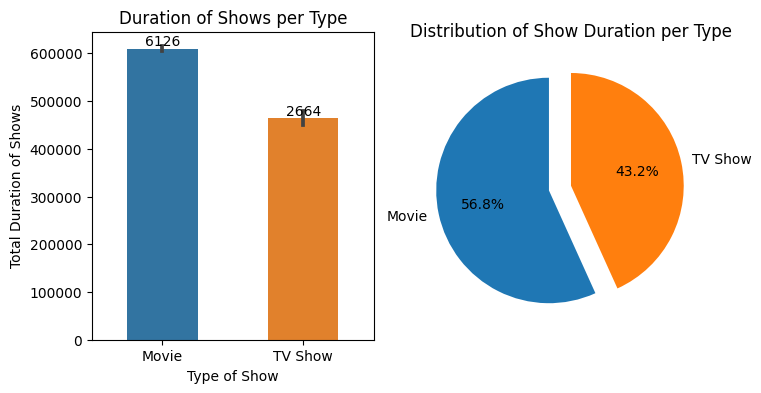

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Duration of Shows per Type')
ax = sns.barplot(x = data['type'], y = data['duration_min'], width = 0.5, estimator = sum)
ax.bar_label(container = ax.containers[0], labels = data['type'].value_counts().values)
plt.xlabel('Type of Show')
plt.ylabel('Total Duration of Shows')
plt.subplot(1,2,2)
plt.title('Distribution of Show Duration per Type')
plt.pie(data.groupby(by=['type'])['duration_min'].sum(), labels = data['type'].value_counts().index, autopct='%1.1f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2,0])
plt.show()

*  When we compare the Movies and the TV Shows by their total duration, we can see that Movies are about 57% and TV Shows are about 43%
*  So, 30% of TV Shows contribute for 43% of the view timing.

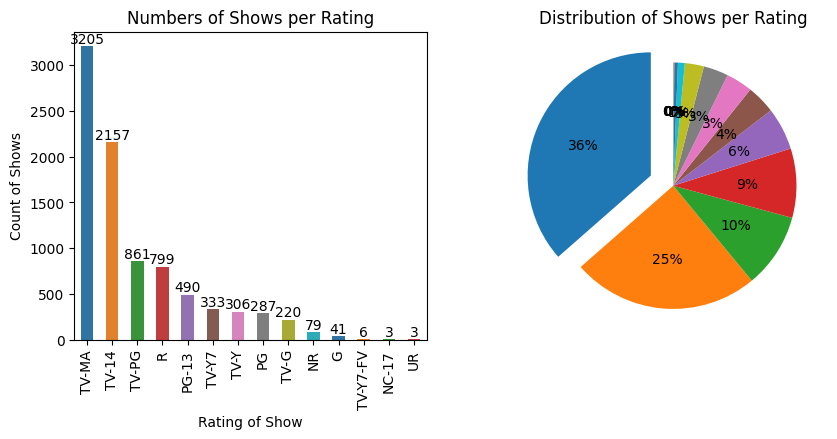

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Numbers of Shows per Rating')
ax = sns.countplot(data, x = 'rating', width = 0.5, order = data['rating'].value_counts().index, palette = sns.color_palette())
ax.bar_label(container = ax.containers[0], labels = data['rating'].value_counts().values)
plt.xlabel('Rating of Show')
plt.xticks(rotation = 90)
plt.ylabel('Count of Shows')
plt.subplot(1,2,2)
plt.title('Distribution of Shows per Rating')
plt.pie(data['rating'].value_counts().values, autopct='%1.0f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2] + [0]*(data['rating'].nunique()-1))
plt.show()

*  Among the shows which have the rating, it is clear that shows with rating "TV-MA", "TV-14", "TV-PG", "R" occupy about 80% of the total shows
*  Remaning show ratings come under only balance 20%
*  The top four rated shows dominate the market and must be very popular, since most directors are making these kind of movies.
*  Shows with rating "TV-Y7-FV", "NC-17", "UR" does not have any presence at all
*  These ratings may be not frequestly used or these shows are not at all popular

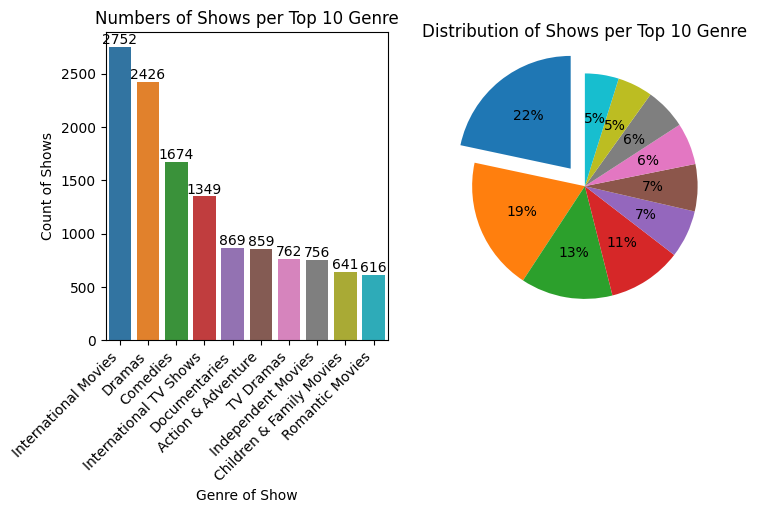

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Numbers of Shows per Top 10 Genre')
ax = sns.countplot(data = data_genre , x='genre', width = 0.8, order = data_genre['genre'].value_counts().index[:10], palette = sns.color_palette())
ax.bar_label(container = ax.containers[0], labels = data_genre['genre'].value_counts().values[:10])
plt.xlabel('Genre of Show')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Shows')
plt.subplot(1,2,2)
plt.title('Distribution of Shows per Top 10 Genre')
plt.pie(data_genre['genre'].value_counts().values[:10], autopct='%1.0f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2] + [0]*9)
plt.show()

*  This graph shows the shows for the top 10 genres. We have a total of 42 genres
*  Among movies, "International Movies" are famous
*  Among TV Shows, "International TV Shows" are famous
*  More that 60% of the shows are dominated by 4 types of genre.
*  Only 2 TV show genre make it to the Top 10, those are "International TV Shows". "TV Dramas"
*  People are more interested in watching movies a lot.

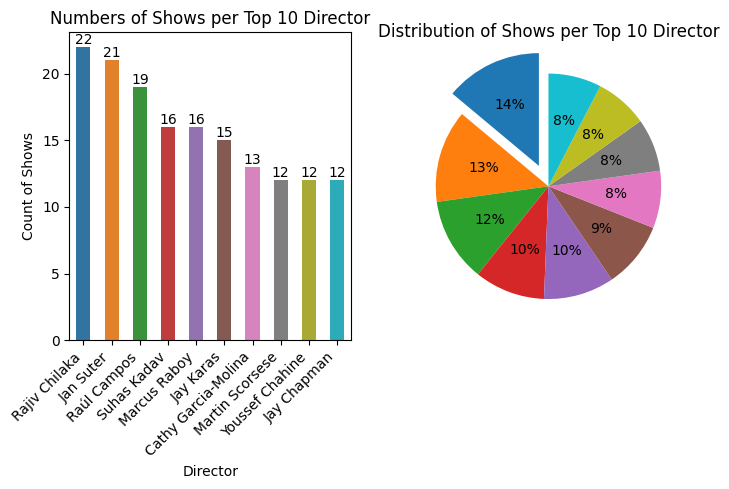

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Numbers of Shows per Top 10 Director')
ax = sns.countplot(data_dir, x = 'director', width = 0.5, order = data_dir['director'].value_counts().index[:10], palette = sns.color_palette())
ax.bar_label(container = ax.containers[0], labels = data_dir['director'].value_counts().values[:10])
plt.xlabel('Director')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Shows')
plt.subplot(1,2,2)
plt.title('Distribution of Shows per Top 10 Director')
plt.pie(data_dir['director'].value_counts().values[:10], autopct='%1.0f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2] + [0]*9)
plt.show()

*  Netflix hosts more movies/shows directed by Rajiv Chilaka. There are a total of 22 shows/movies directed by Rajiv.
*  Among the top 10 directors, everyone has made more or less equal number of movies with 10% of movies
*  It seems movies by Rajiv are well liked.

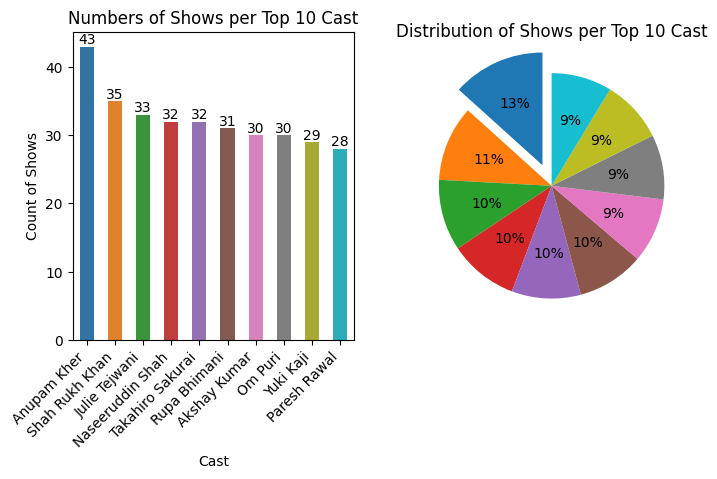

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Numbers of Shows per Top 10 Cast')
ax = sns.countplot(data_cast, x = 'cast', width = 0.5, order = data_cast['cast'].value_counts().index[:10], palette = sns.color_palette())
ax.bar_label(container = ax.containers[0], labels = data_cast['cast'].value_counts().values[:10])
plt.xlabel('Cast')
plt.xticks(rotation = 45 , ha = 'right')
plt.ylabel('Count of Shows')
plt.subplot(1,2,2)
plt.title('Distribution of Shows per Top 10 Cast')
plt.pie(data_cast['cast'].value_counts().values[:10], autopct='%1.0f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2] + [0]*9)
plt.show()

*  By Cast, we see that Anupam Kher has acted in a lots of movies. He has acted in 43 movies/shows in total which are lised in Netflix
*  Apart from Anupam, the remaining top 9 actors have acted in approximately 30 shows/movies.
*  No one seems to domintaing the number of movies acted in.

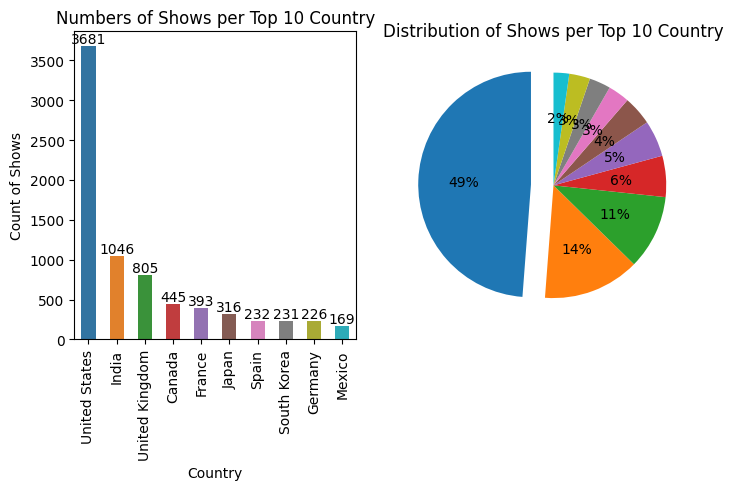

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Numbers of Shows per Top 10 Country')
ax = sns.countplot(data_country, x = 'country', width = 0.5, order = data_country['country'].value_counts().index[:10], palette = sns.color_palette())
ax.bar_label(container = ax.containers[0], labels = data_country['country'].value_counts().values[:10])
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Count of Shows')
plt.subplot(1,2,2)
plt.title('Distribution of Shows per Top 10 Country')
plt.pie(data_country['country'].value_counts().values[:10], autopct='%1.0f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2] + [0]*9)
plt.show()

*  When we see the number of shows by country, United States is the clear winner. US has about 50% of shows.
*  While the second place India has 14% of the shows
*  UK had 11% of the shows
*  It seems that the top 3 countries dominate about 75% of the market share for the shows.

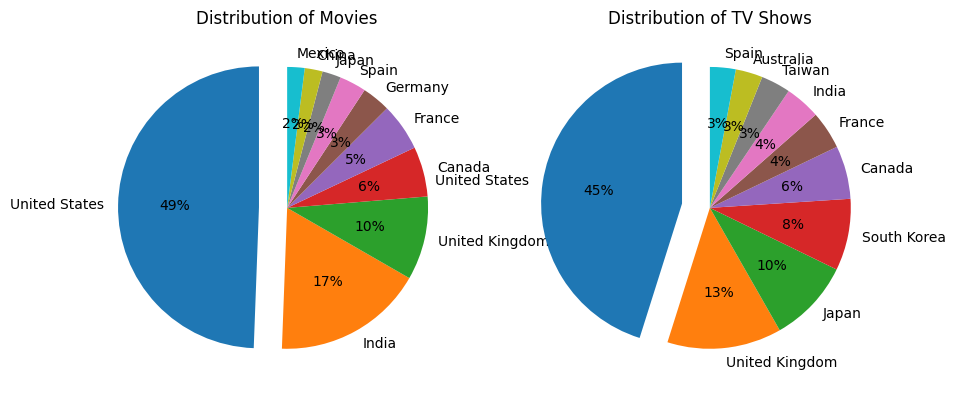

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Distribution of Movies')
plt.pie(data_country[data_country['type']=='Movie']['country'].value_counts().values[:10], labels = data_country[data_country['type']=='Movie']['country'].value_counts().index[:10] , autopct='%1.0f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2] + [0]*9)
plt.subplot(1,2,2)
plt.title('Distribution of TV Shows')
plt.pie(data_country[data_country['type']=='TV Show']['country'].value_counts().values[:10], labels = data_country[data_country['type']=='TV Show']['country'].value_counts().index[:10] , autopct='%1.0f%%', startangle = 90, colors = sns.color_palette(), explode = [0.2] + [0]*9)
plt.show()

*  For Movies, US, India, UK alone take 75% of the market share.
*  For TV Shows, India falls to the 7th position.
*  Whereas, Japan, South Korea and Canada has more number of TV Shows being produced and viewed.

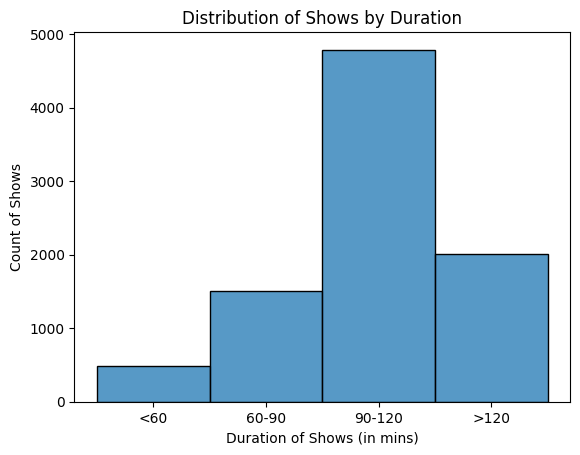

In [ ]:
duration_bins = [0,60,90,120,1700]
duration_bin_label = ['<60','60-90','90-120','>120']
data_hist = data
data_hist['duration_min'] = pd.cut(data['duration_min'], bins = duration_bins, labels = duration_bin_label)
sns.histplot(data_hist, x = 'duration_min')
plt.title('Distribution of Shows by Duration')
plt.xlabel('Duration of Shows (in mins)')
plt.ylabel('Count of Shows')
plt.show()

*  The distribution of TV Shows by durations shows that most of the shows are produced in the time duration of 90-120mins
*  The reason where shows with greater than 120 mins is more than the shows with 60-90mins, is because of Movies which usually run for more than 120 mins and TV shows with more seasons and episodes.

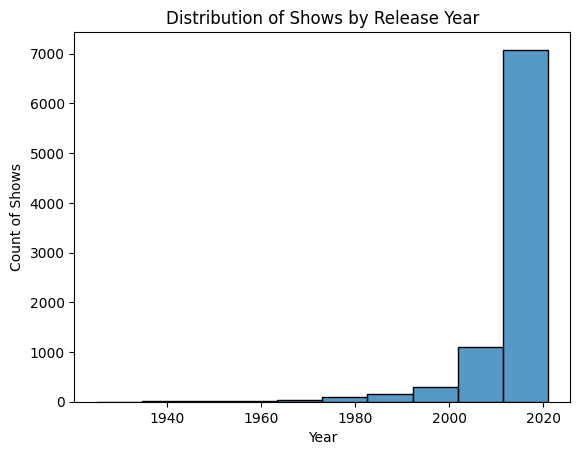

In [ ]:
sns.histplot(data['release_year'], bins = 10)
plt.title('Distribution of Shows by Release Year')
plt.xlabel('Year')
plt.ylabel('Count of Shows')
plt.show()

*  This distribution shows that almost all the movies added to the platform are made in the recent years.
*  Movies which are old are not added that frequently and seems to be of less interest to people.

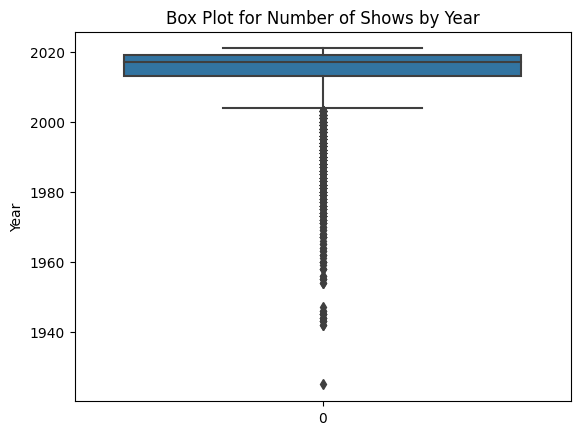

In [ ]:
sns.boxplot(data['release_year'])
plt.title('Box Plot for Number of Shows by Year')
plt.ylabel('Year')
plt.show()

*  Most of the shows made before 2000 are very less in count, so these were not mostly watched.

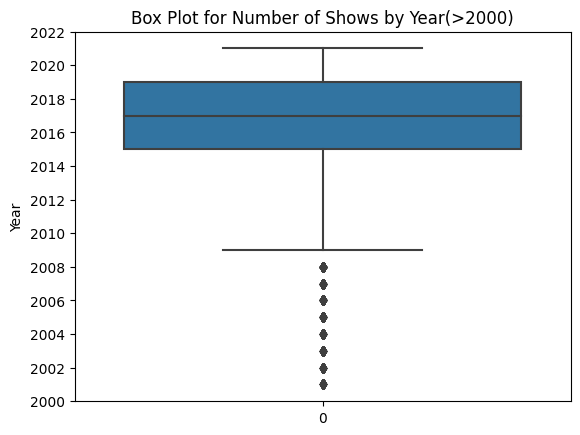

In [ ]:
sns.boxplot(data[data['release_year'] > 2000]['release_year'])
plt.title('Box Plot for Number of Shows by Year(>2000)')
plt.ylabel('Year')
plt.yticks(np.linspace(2000, 2022, 12, dtype = 'int64'))
plt.show()

*  By focusing on the shows released after 2000, we can see that 205 to 2019 was a very active year, where about 50% of the shows were directed
*  Drop in shows after 2019 might be due to the Covid restrictions

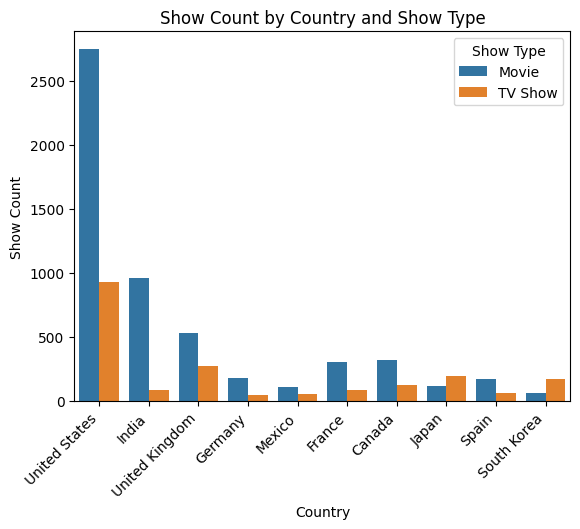

In [ ]:
top_10_country = data_country['country'].value_counts().index[:10]
data_top_country = data_country.loc[data_country['country'].isin(top_10_country)]
sns.countplot(data = data_top_country, x = 'country', hue = 'type')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Country')
plt.ylabel('Show Count')
plt.title('Show Count by Country and Show Type')
plt.legend(title = "Show Type")
plt.show()

*  The distribution between Movies and TV Shows amoung the Top 10 countries is not similar
*  India is lagging behing in the TV Shows. The movies are about 5 times more popular compared to TV shows.
*  UK has about half the number of TV Shows compared to Movies.
*  Japan and South Korea has more TV Shows compared to Movies
*  France, Canada, UK shows more number of Movies compared to TV Shows


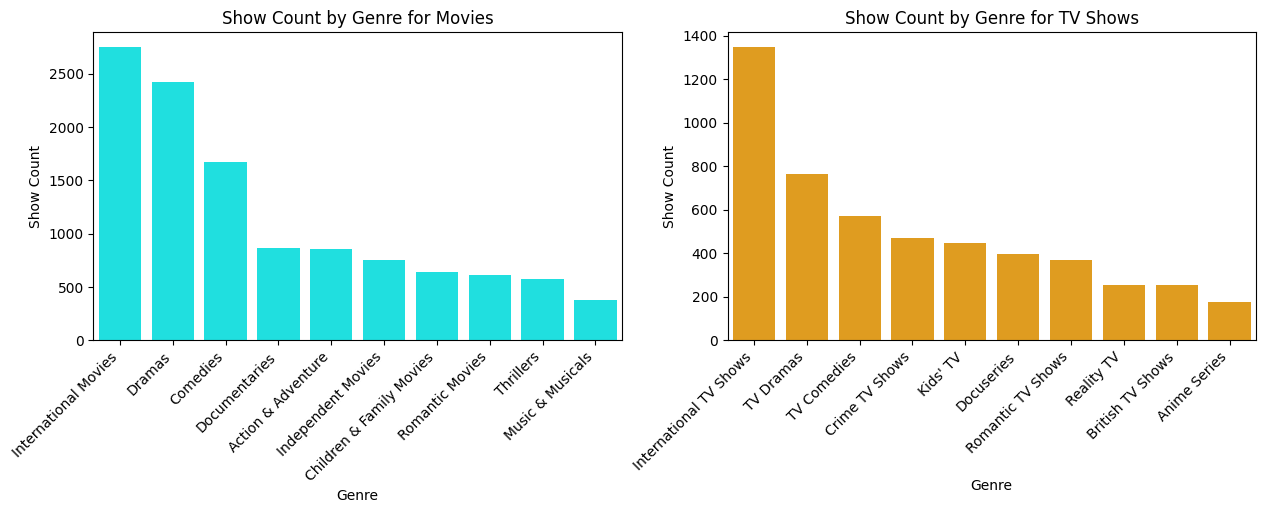

In [ ]:
top_10_genre_tv = data_genre[data_genre['type'] == 'TV Show']['genre'].value_counts().index[:10]
data_top_genre_tv = data_genre.loc[data_genre['genre'].isin(top_10_genre_tv)]

top_10_genre_movie = data_genre[data_genre['type'] == 'Movie']['genre'].value_counts().index[:10]
data_top_genre_movie = data_genre.loc[data_genre['genre'].isin(top_10_genre_movie)]

plt.figure(figsize =(15,4))

plt.subplot(1,2,1)
sns.countplot(data = data_top_genre_movie, x = 'genre', color = 'cyan', order = top_10_genre_movie)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genre')
plt.ylabel('Show Count')
plt.title('Show Count by Genre for Movies')

plt.subplot(1,2,2)
sns.countplot(data = data_top_genre_tv, x = 'genre', color = 'orange', order = top_10_genre_tv)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genre')
plt.ylabel('Show Count')
plt.title('Show Count by Genre for TV Shows')

plt.show()

*  Both Movies and TV Shows are more favoured for the following Genre
    1. International Movies/TV Shows
    2. Dramas
    3. Comdies
    4. Childern Shows
    5. Romantic Shows
    6. Documentaries
*  This shows that people are interested in these genres irrespective of whether it is Movies or TV Shows
*  Almost 6 out of the top 10 genres are common for both TV shows and Movies.
*  Any show out of these genre will work in both movies and TV shows

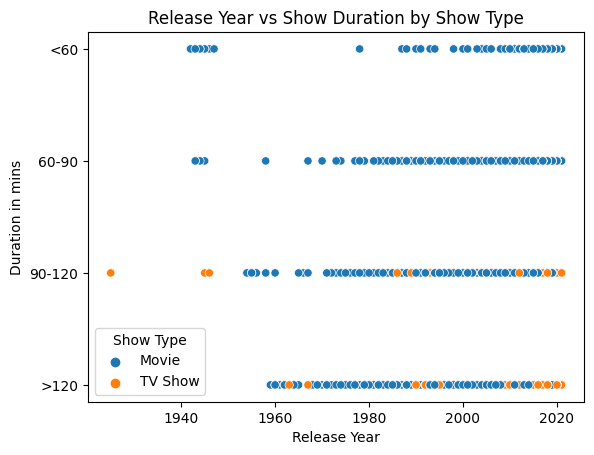

In [ ]:
plt.title("Release Year vs Show Duration by Show Type")
sns.scatterplot(data = data, x = 'release_year', y = 'duration_min', hue = 'type')
plt.legend(title = 'Show Type')
plt.xlabel('Release Year')
plt.ylabel('Duration in mins')
plt.show()

*  Movies are present for almost most of the years released from 1960 to 2021.
*  TV shows are present only for some periods. It seems that not many TV shows are added to Netflix
*  TV shows released from the year 2000 to 2010 are almost missing
*  We can also see that all the TV show duration is more than 90 mins.

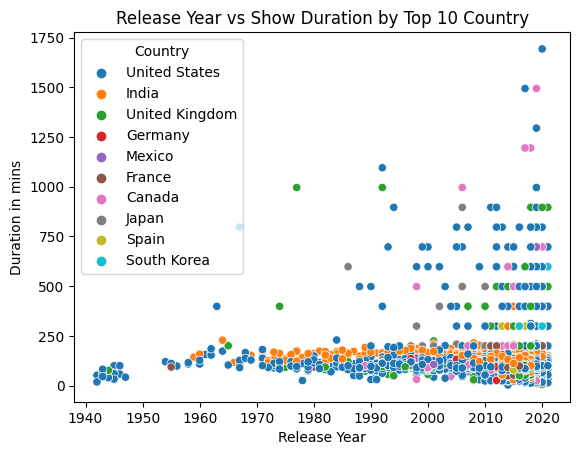

In [ ]:
plt.title("Release Year vs Show Duration by Top 10 Country")
sns.scatterplot(data = data_top_country, x = 'release_year', y = 'duration_min', hue = 'country')
plt.legend(title = 'Country')
plt.xlabel('Release Year')
plt.ylabel('Duration in mins')
plt.show()

*  We see that most of the shows from India are having duration more than 120mins. Maybe due the to less number of TV shows in India
*  UK has more shows with duration less than 60 mins
*  Mexico has no shows in time duration less than 90mins

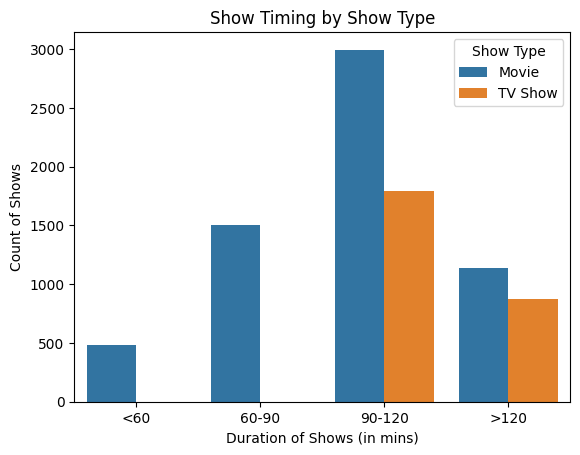

In [ ]:
sns.countplot(data_hist, x = 'duration_min', hue = 'type')
plt.title('Show Timing by Show Type')
plt.xlabel('Duration of Shows (in mins)')
plt.legend(title = 'Show Type')
plt.ylabel('Count of Shows')
plt.show()

*  No TV shows are produced with time less than 90 mins
*  Most of the shows and TV fall into the cateory of 90 mins to 120 mins

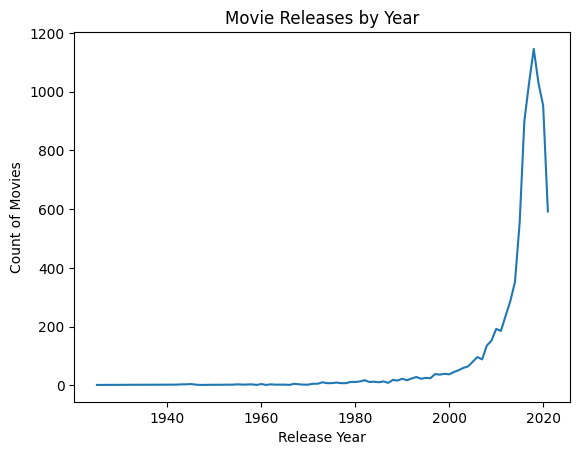

In [ ]:
plt.plot(np.sort(data['release_year'].unique()), data['release_year'].value_counts().sort_index())
plt.title('Movie Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Count of Movies')
plt.show()

*  More movie releases in the year 2010 afterwards
*  More movies were released in the year 2018. Aterwards the movie release count dropped.

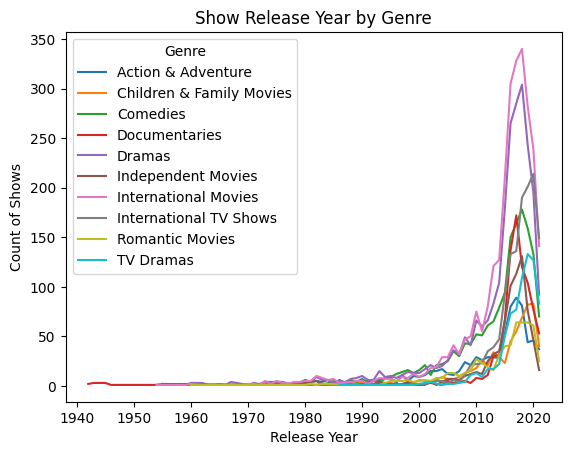

In [ ]:
top_10_genre = data_genre['genre'].value_counts().index[:10]
data_top_genre = data_genre.loc[data_genre['genre'].isin(top_10_genre)]

data_grp_genre_ryear = data_top_genre[['genre', 'release_year']].groupby(by = ['genre', 'release_year']).size().reset_index()
sns.lineplot(data = data_grp_genre_ryear, x = 'release_year', y = data_grp_genre_ryear.columns[2], hue = 'genre')
plt.title('Show Release Year by Genre')
plt.xlabel('Release Year')
plt.ylabel('Count of Shows')
plt.legend(title = 'Genre')
plt.show()

*  All the genre follow the same trend for the movie/show release year.
*  Almost all the top 10 genre has a drop in releases after 2018.

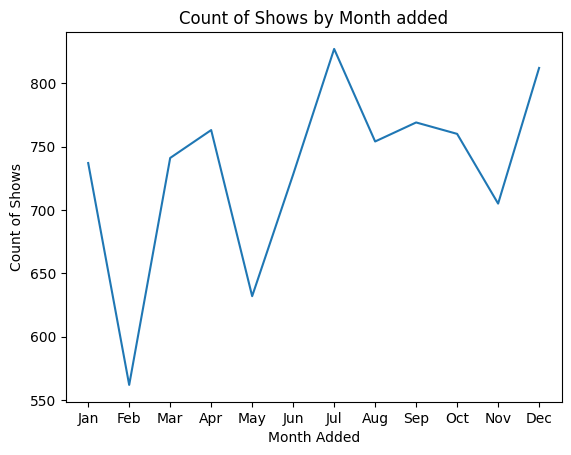

In [ ]:
data_month = data['date_added'].dt.month
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.lineplot(data_month.value_counts().sort_index())
plt.xticks(ticks = np.arange(1,13), labels = month_label)
plt.xlabel('Month Added')
plt.ylabel('Count of Shows')
plt.title('Count of Shows by Month added')
plt.show()

*  The total show count sees a drop in February and May considering the whole time period for the month added to the Netflix Platform
*  Whereas March and July shows a spike in the numbers of Shows added to the Platform

<ipython-input-51-55e8230c5eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_genre['month'] = data_top_genre['date_added'].dt.month


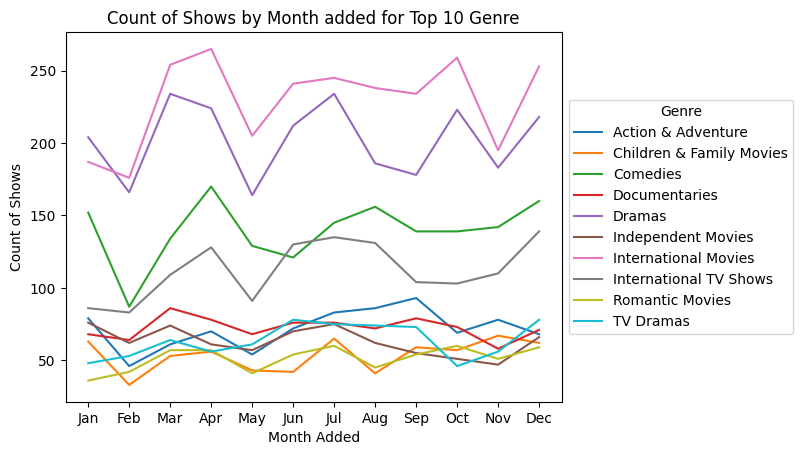

In [ ]:
data_top_genre['month'] = data_top_genre['date_added'].dt.month

data_grp_genre_month = data_top_genre[['genre', 'month']].groupby(by = ['genre', 'month']).size().reset_index()
sns.lineplot(data = data_grp_genre_month, x = 'month', y = data_grp_genre_month.columns[2], hue = 'genre')

plt.xticks(ticks = np.arange(1,13), labels = month_label)
plt.xlabel('Month Added')
plt.ylabel('Count of Shows')
plt.title('Count of Shows by Month added for Top 10 Genre')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title= 'Genre')
plt.show()

*  Mostly all the genre see a drop in the show count in the month of February
*  All the genre shows then raises for the month of March and April.

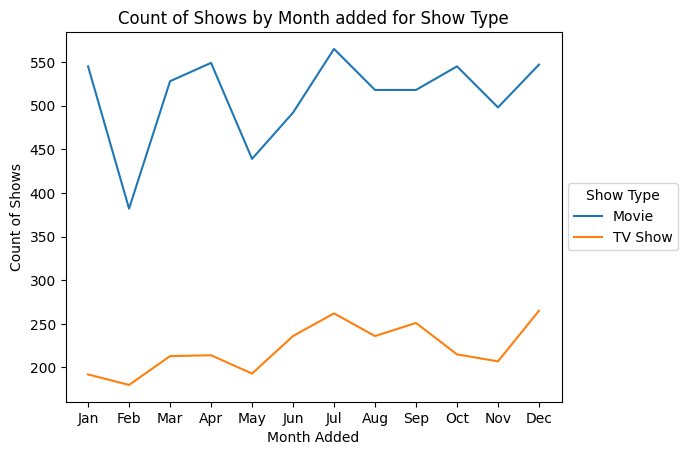

In [ ]:
data['month'] = data['date_added'].dt.month
data_grp_type_month = data[['type', 'month']].groupby(by = ['type', 'month']).size().reset_index()
sns.lineplot(data = data_grp_type_month, x = 'month', y = data_grp_type_month.columns[2], hue = 'type')

plt.xticks(ticks = np.arange(1,13), labels = month_label)
plt.xlabel('Month Added')
plt.ylabel('Count of Shows')
plt.title('Count of Shows by Month added for Show Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title= 'Show Type')
plt.show()

*  Comparing the month wise trend for the Movies and the TV Shows, it is clear that TV shows has almost the same number of shows added to the platform.
*  The major change is due to the large fluctuations in the movie shows getting added to the Platform
*  This large change in movies affects the overall month wise trend
*  In the month of October even though TV Show count decreases, the movie count increases. This shows that people are more interested in watching the movies during that time.

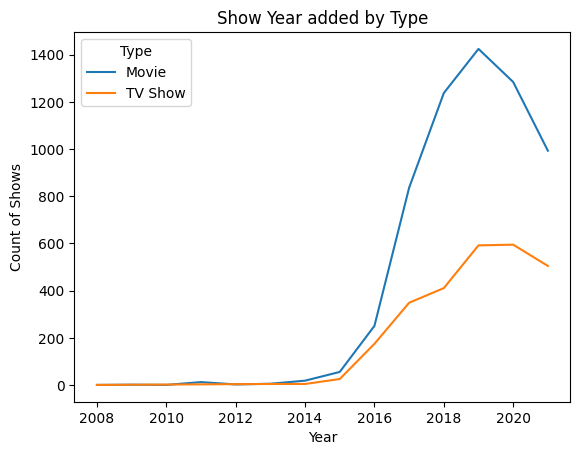

In [ ]:
data['year_added'] = data['date_added'].dt.year

data_grp_type_year = data[['type', 'year_added']].groupby(by = ['type', 'year_added']).size().reset_index()
sns.lineplot(data = data_grp_type_year, x = 'year_added', y = data_grp_genre_ryear.columns[2], hue = 'type')
plt.title('Show Year added by Type')
plt.xlabel('Year')
plt.ylabel('Count of Shows')
plt.legend(title = 'Type')
plt.show()

*  Both the TV shows and the movies follow the same trend for the year wise distribution for the date added.

<ipython-input-54-d818a358ff0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_country['year_added'] = data_top_country['date_added'].dt.year


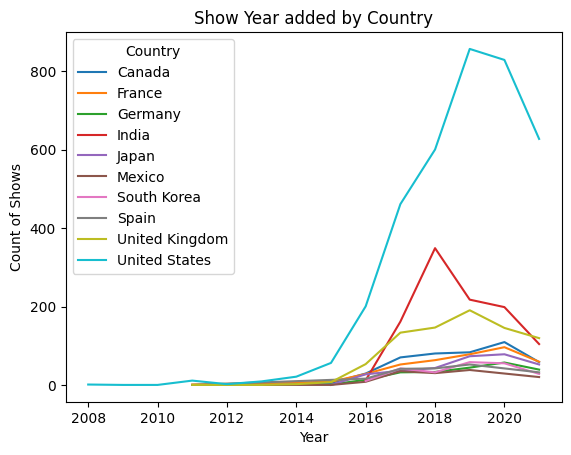

In [ ]:
data_top_country['year_added'] = data_top_country['date_added'].dt.year

data_grp_country_year = data_top_country[['country', 'year_added']].groupby(by = ['country', 'year_added']).size().reset_index()
sns.lineplot(data = data_grp_country_year, x = 'year_added', y = data_grp_genre_ryear.columns[2], hue = 'country')
plt.title('Show Year added by Country')
plt.xlabel('Year')
plt.ylabel('Count of Shows')
plt.legend(title = 'Country')
plt.show()

*  Country wise distribution of the shows also show the same trend over the years. Most of the countries see a fall in show count after 2019.

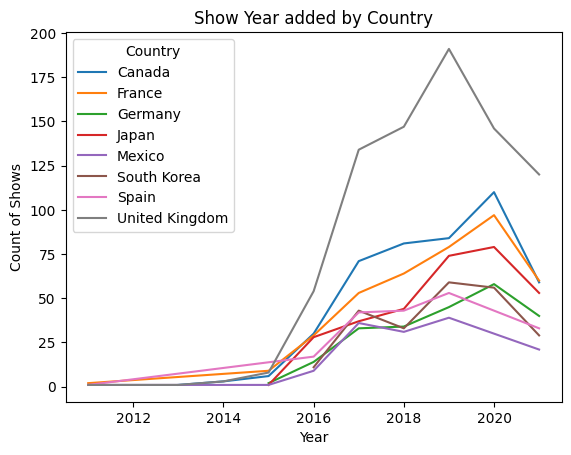

In [ ]:
#lets remove US and India and have a closer look at other countries
data_grp_country_year = data_top_country[['country', 'year_added']].groupby(by = ['country', 'year_added']).size().reset_index()
data_grp_country_year_2 = data_grp_country_year[~data_grp_country_year['country'].isin(['United States', 'India'])]
sns.lineplot(data = data_grp_country_year_2, x = 'year_added', y = data_grp_country_year_2.columns[2], hue = 'country')
plt.title('Show Year added by Country')
plt.xlabel('Year')
plt.ylabel('Count of Shows')
plt.legend(title = 'Country')
plt.show()

*  Removing US and India, reveals something interesting. All the other countries seem to have a rise in show count from 2018 to 2020 and sees a drop in 2021.
*  People in other countries were active in the Platform more durin the time 2019 to 2021

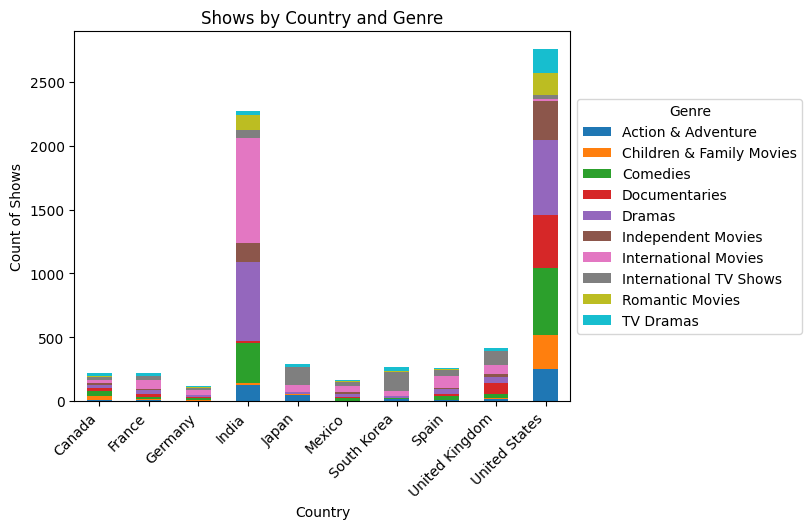

In [ ]:
data_top_genre_country = data_top_genre[data_top_genre['country'].isin(top_10_country)]

data_grp_genre_country = data_top_genre_country[['country', 'genre']].groupby(by = ['country', 'genre']).size().reset_index()
data_grp_genre_country = data_grp_genre_country.pivot(index = 'country', columns = ['genre'], values = [0])
data_grp_genre_country.columns = data_grp_genre_country.columns.droplevel(0)

data_grp_genre_country.plot.bar(stacked = True)
plt.title('Shows by Country and Genre')
plt.xlabel('Country')
plt.ylabel('Count of Shows')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title= 'Genre')
plt.show()

*   Shows by Country and Genre reveals the following facts
    1.  International Movies are the most famous genre in India followed by Dramas
    2.  Dramas are the most famous genre in US
    3.  International TV Shows are mostly watched in Japan, South Korea and UK

<ipython-input-57-7b59fbe02aa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bottom_genre['month'] = data_bottom_genre['date_added'].dt.month


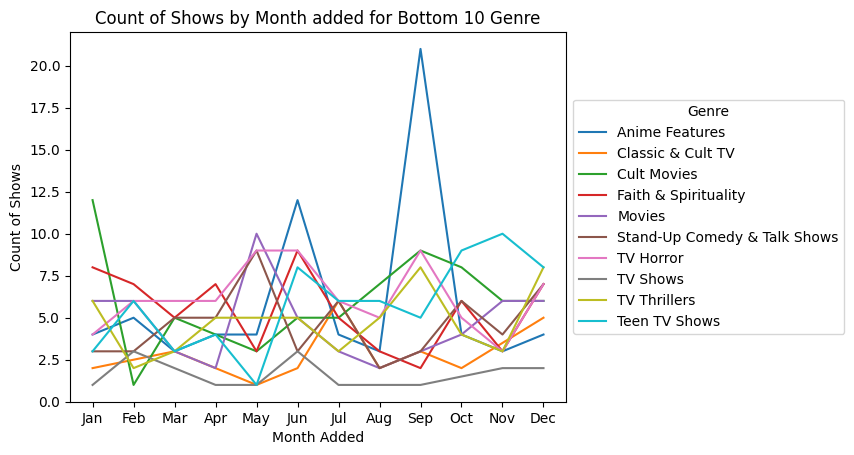

In [ ]:
bottom_10_genre = data_genre['genre'].value_counts().index[-10:]
data_bottom_genre = data_genre.loc[data_genre['genre'].isin(bottom_10_genre)]

data_bottom_genre['month'] = data_bottom_genre['date_added'].dt.month

data_grp_bgenre_month = data_bottom_genre[['genre', 'month']].groupby(by = ['genre', 'month']).size().reset_index()
sns.lineplot(data = data_grp_bgenre_month, x = 'month', y = data_grp_bgenre_month.columns[2], hue = 'genre')

plt.xticks(ticks = np.arange(1,13), labels = month_label)
plt.xlabel('Month Added')
plt.ylabel('Count of Shows')
plt.title('Count of Shows by Month added for Bottom 10 Genre')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title= 'Genre')
plt.show()

*  Analysis of the Bottom 10 genre month wise shows that Animes peak during the September month.

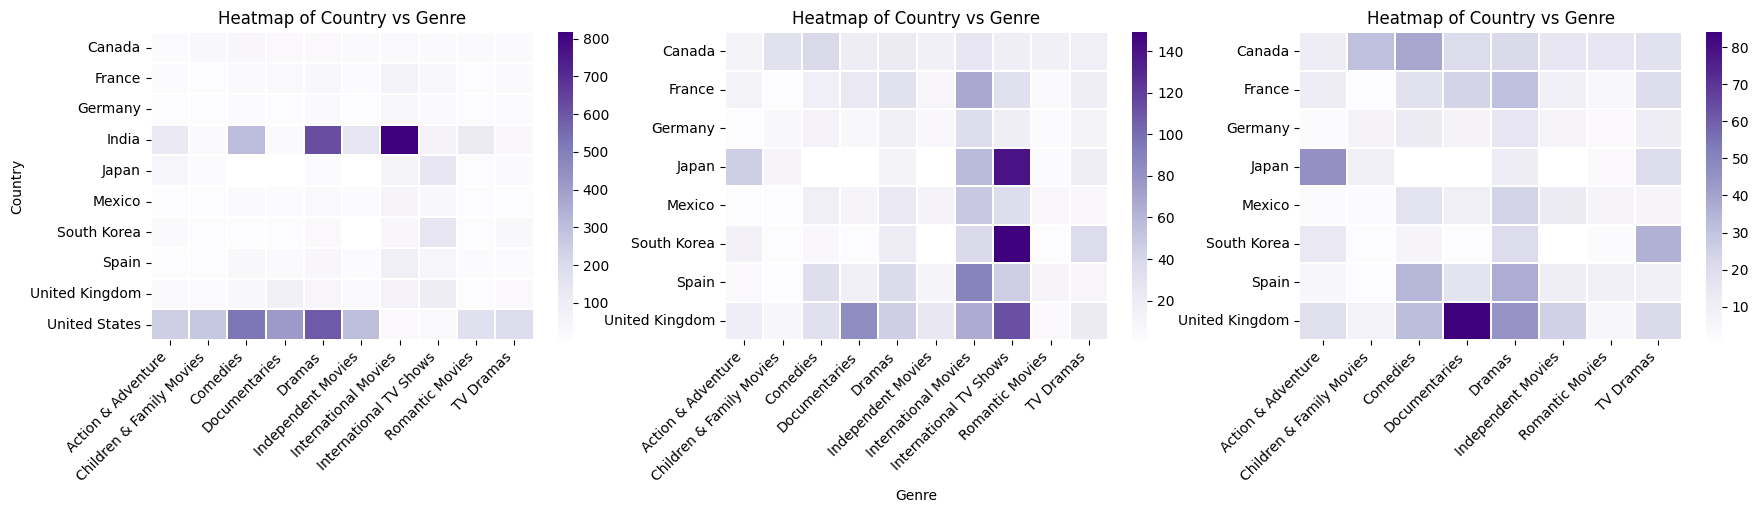

In [ ]:
plt.figure(figsize = (21,4))
plt.subplot(1,3,1)
sns.heatmap(data_grp_genre_country, cmap = 'Purples', linewidths = 0.3)
plt.xlabel('')
plt.ylabel('Country')
plt.title('Heatmap of Country vs Genre')
plt.xticks(rotation = 45, ha = 'right')

plt.subplot(1,3,2)
sns.heatmap(data_grp_genre_country.drop(['India', 'United States']), cmap = 'Purples', linewidths = 0.3)
plt.xlabel('Genre')
plt.ylabel('')
plt.title('Heatmap of Country vs Genre')
plt.xticks(rotation = 45, ha = 'right')

plt.subplot(1,3,3)
sns.heatmap(data_grp_genre_country.drop(index = ['India', 'United States'], columns = ['International Movies', 'International TV Shows']), cmap = 'Purples', linewidths = 0.3)
plt.xlabel('')
plt.ylabel('')
plt.title('Heatmap of Country vs Genre')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

*   Relatively, India and US hosts the most number of Shows with a variety of Genre.
*   International Movies are the most popular in India, also in other countries like Japan, South Korea nad UK
*   Most of the foreign countries are interested in watching shows of International Origin, evident from the second Heat map
*   Documentaries are the most famous in US and UK. Other countries are not more interested in documentaries.

<ipython-input-59-867e572faa5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dur['years_to_list'] = data_dur['date_added'].dt.year - data_dur['release_year']
<ipython-input-59-867e572faa5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dur.drop(index = data_dur[data_dur['years_to_list'] < 0].index, inplace = True)


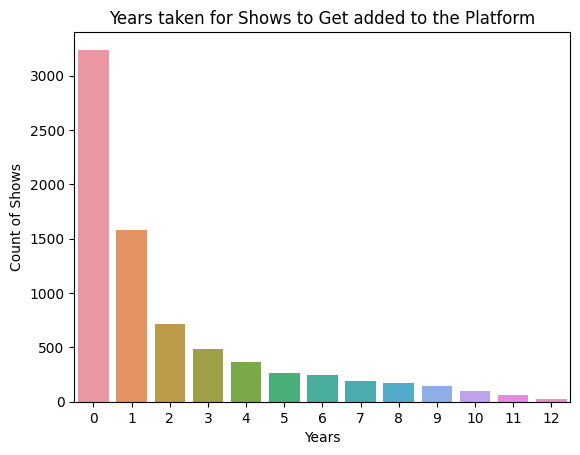

In [ ]:
data_dur = data.loc[data['release_year'] > data['date_added'].dt.year.min()]
data_dur['years_to_list'] = data_dur['date_added'].dt.year - data_dur['release_year']
data_dur.drop(index = data_dur[data_dur['years_to_list'] < 0].index, inplace = True)

sns.countplot(data_dur, x = 'years_to_list')
plt.xlabel('Years')
plt.ylabel('Count of Shows')
plt.title('Years taken for Shows to Get added to the Platform')
plt.show()

*  More than half the shows are added to the platform only after an year

# Recommendations

1. Number of TV Shows contribute only 30%. We need to increase the number of TV Shows and also TV shows from different time period needs to be included. We can see that TV shows from only specific time periods are added to the platform.
2. Include more TV shows with rating TV-G, TV-Y, TV-Y7 and movies with PG, NR, G. Movies with these rating are very less compared to top 3 rated shows.
3. We have to tap the potential in India and China with their huge population. Increase the number of Shows. Produce more TV shows in India to bring them to number 2 position similar to movies. Most of the shows are with duration around 150mins. More and more people are liking to watch TV shows with multiple seasons and episodes.
4. Promote South Korean & Japan movies to people who watch South Korean & Japan Dramas, since those are popular among the viewers.
5. People like to watch a lot of Dramas, Documentaries and Comedies, but these are popular only is few countries. We have to promote more dramas and comedies which are suited to the taste of the particular countries.
6. The rate of new movies getting added to the platform is decreasing after 2019. Netflix should start producing new shows to increase the show content.
7. The month wise trend shows that there is no consistency in the shows getting added to the Platform. Netflix must add the shows to the platfrom in a consistent manner, so as not to add too many or too little shows.
8. Anime shows some increase among the least favoured genre. More promotion will increase the streaming of those shows.
9. More than half the shows are added to the platform only after an year. Netflix needs to add the shows to the platform within the same year, so that viewers will be interested in watching the new shows.